# Exploration de la science économique 

## Macro 1 ere année : file:///C:/Users/Laurent/Downloads/www.cours-gratuit.com--id-6762.pdf

<IPython.core.display.Javascript object>


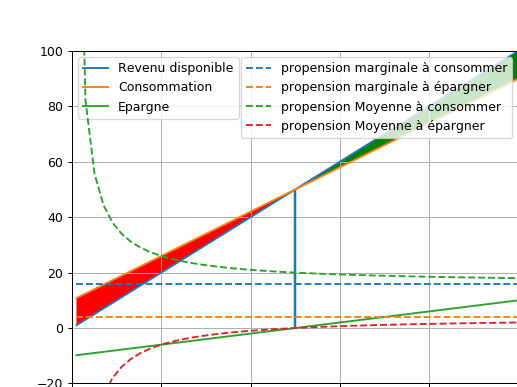

interactive(children=(FloatSlider(value=10.0, description='C0', max=50.0, min=-50.0, step=0.2), FloatSlider(va…

In [23]:
%matplotlib notebook
#from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

Ydt = np.linspace(1, 100) # on commence à 1 pour eviter la dic par 0 dans la dérivé
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid()

# On va tracer Revenu, Conso, Epargne courante

C0 = 5 # je sais pas quoi mettre par défaut mais l'idée est de regarder + et -
c = 0.8 # on consomme 0.8 de notre revenu dispo 
Ct = C0 + c * Ydt
St = - C0 + (1-c) * Ydt
lineYt, = ax.plot(Ydt, Ydt, label='Revenu disponible')
lineCt, = ax.plot(Ydt, Ct, label='Consommation')
lineSt, = ax.plot(Ydt, St, label='Epargne')
ax.legend(handles=[lineYt, lineCt,lineSt])

lineCom = [[(C0/(1-c),0),(C0/(1-c), C0 + c *C0/(1-c))]]
lc = mc.LineCollection(lineCom, linewidths=2)
ax.add_collection(lc)
ax.fill_between(Ydt, Ydt, Ct, where= Ydt >= Ct,
                 facecolor='green', interpolate=True)
# On va tracer Revenu, Conso, Epargne MARGINAL(E)

ax2 = ax.twinx()
linePmC, = ax2.plot(Ydt, c*np.ones_like(Ydt),'--', label='propension marginale à consommer')
linePmS, = ax2.plot(Ydt, (1-c)*np.ones_like(Ydt),'--', label='propension marginale à épargner')

PMC =  C0 / Ydt + c
PMS = -C0 / Ydt + 1-c
linePMC, = ax2.plot(Ydt,PMC,'--', label='propension Moyenne à consommer')
linePMS, = ax2.plot(Ydt,PMS,'--', label='propension Moyenne à épargner')
ax2.legend(handles=[linePmC,linePmS,linePMC, linePMS])

def update(C0 = 5.0, c = 0.8):
    Ct = C0 + c * Ydt
    St = - C0 + (1-c) * Ydt
    lineCt.set_ydata(Ct)
    lineSt.set_ydata(- C0 + (1-c) * Ydt)
    lineCom = [[(C0 / (1-c),0),(C0/(1-c), C0 + c *C0 / (1-c))]]
    #lc.set_segments(lineCom)
    ax.collections.clear()
    ax.fill_between(Ydt, Ydt, Ct, where= Ydt >= Ct,
                 facecolor='green', interpolate=True)
    ax.fill_between(Ydt, Ydt, Ct, where= Ydt <= Ct,
                 facecolor='red', interpolate=True)
    lineCom = [[(C0/(1-c),0),(C0/(1-c), C0 + c *C0/(1-c))]]
    lc = mc.LineCollection(lineCom, linewidths=2)
    ax.add_collection(lc)
    fig.canvas.draw_idle()
    ax.axis([0, 100, -20, 100])
    PMC =  C0/Ydt+ c
    PMS = -C0/Ydt+ 1-c
    linePMC.set_ydata(PMC)
    linePMS.set_ydata(PMS)
    
    ax2.axis([0, 100, -1, 5])
    
    
    
    
interact(update,
         C0=widgets.FloatSlider(min=-50.0, max=50.0, step=0.2, value=10.0),
         c=widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.8)
         );

In [ ]:
SECTION II – LA THEORIE DU CHOIX INTERTEMPOREL DE FISHER
Pour simplifier notre raisonnement, nous supposons un ménage représentatif :
- dont l’espérance de vie est de deux périodes : le présent (période1) et le futur (période 2),
- qui n’a pas de richesse initiale et qui ne lègue rien à ses héritiers4
.
Supposons que ce ménage a une préférence pour le présent (ρ) c'est-à-dire qu’entre une unité
de consommation au présent et la même unité au futur, il préfère consommer au présent.
Le taux d’intérêt réel (r)
5
 est la récompense de la renonciation au présent, c'est-à-dire la
récompense de l’abstinence. Autrement dit, ce ménage obtiendrait (1 + r) unités de
consommation au futur s’il accepte de renoncer à une unité de consommation au présent. 

a) La notion de richesse 
W = Y1 + Y2 / (1+r)
avec W : Richesse 
     Y1 : Revenu dispo au present
     Y2 : Revenu qui sera dispo dans le futur
        
b) La contrainte budgétaire
Par contrainte budgétaire d’un ménage, nous désignons l’égalité entre ses ressources et leur
emploi. Il s’agit, ici, de l’égalité entre la somme de ses revenus disponibles réels actualisés et
la somme de ses consommations annuelles réelles actualisées. 
# en gros on dit : on passe tous nos revenus dans la conso
C1 +C2/(1+r) = Y1 + Y2/(1+r) = W 
...
C2 = (1+r)W - (1+r)C1

c) La fonction d’utilité
L’objectif du ménage représentatif est de maximiser sa fonction d’utilité inter temporelle :
U = U(C1 , C2) 

d) L’optimum
Maximiser la fonction d’utilité sous la contrainte de richesse :
# essayons graphiquement


<IPython.core.display.Javascript object>


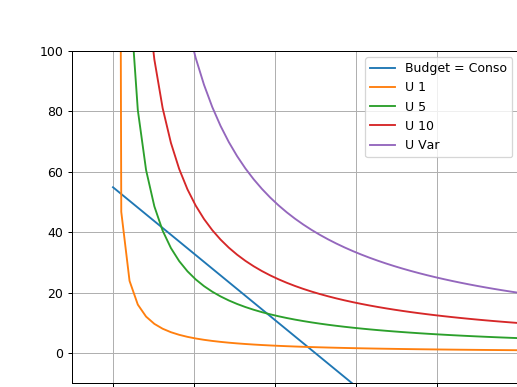

interactive(children=(FloatSlider(value=50.0, description='W', step=0.2), FloatSlider(value=0.1, description='…

In [3]:
C1 = np.linspace(0.1, 100.0)
fig2 = plt.figure()
ax21 = fig2.add_subplot(1, 1, 1)
ax21.grid()

W = 50 #pour un niveau de richesse de 50 ....
r = 0.1 # taux d'interet de la conso future 
C2 = (1+r)*W - (1+r)*C1
lineBudget, = ax21.plot(C1, C2, label='Budget = Conso')
U1 =  100 / C1
U5 =  500 / C1
U10 = 1000 / C1 

lineU1,  = ax21.plot(C1, U1 , label='U 1')
lineU5,  = ax21.plot(C1, U5 , label='U 5')
lineU10,  = ax21.plot(C1, U10 , label='U 10')
UVar = 20
yUvar = UVar*100 / C1
lineUVar,  = ax21.plot(C1, yUvar , label='U Var')

ax21.legend(handles = [lineBudget,lineU1,lineU5,lineU10,lineUVar])
ax21.axis([-10, 100, -10, 100])


def update2(W = 50.0, r = 0.1, UVar = 20):
    C2 = (1+r)*W - (1+r)*C1
    yUvar = UVar*100 / C1
    
    lineBudget.set_ydata(C2)
    lineUVar.set_ydata(yUvar)


interact(update2,
         W=widgets.FloatSlider(min=0, max=100.0, step=0.2, value=50.0),
         r=widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.1),
         UVar=widgets.FloatSlider(min=1, max=40, step=0.5, value=20),
         );

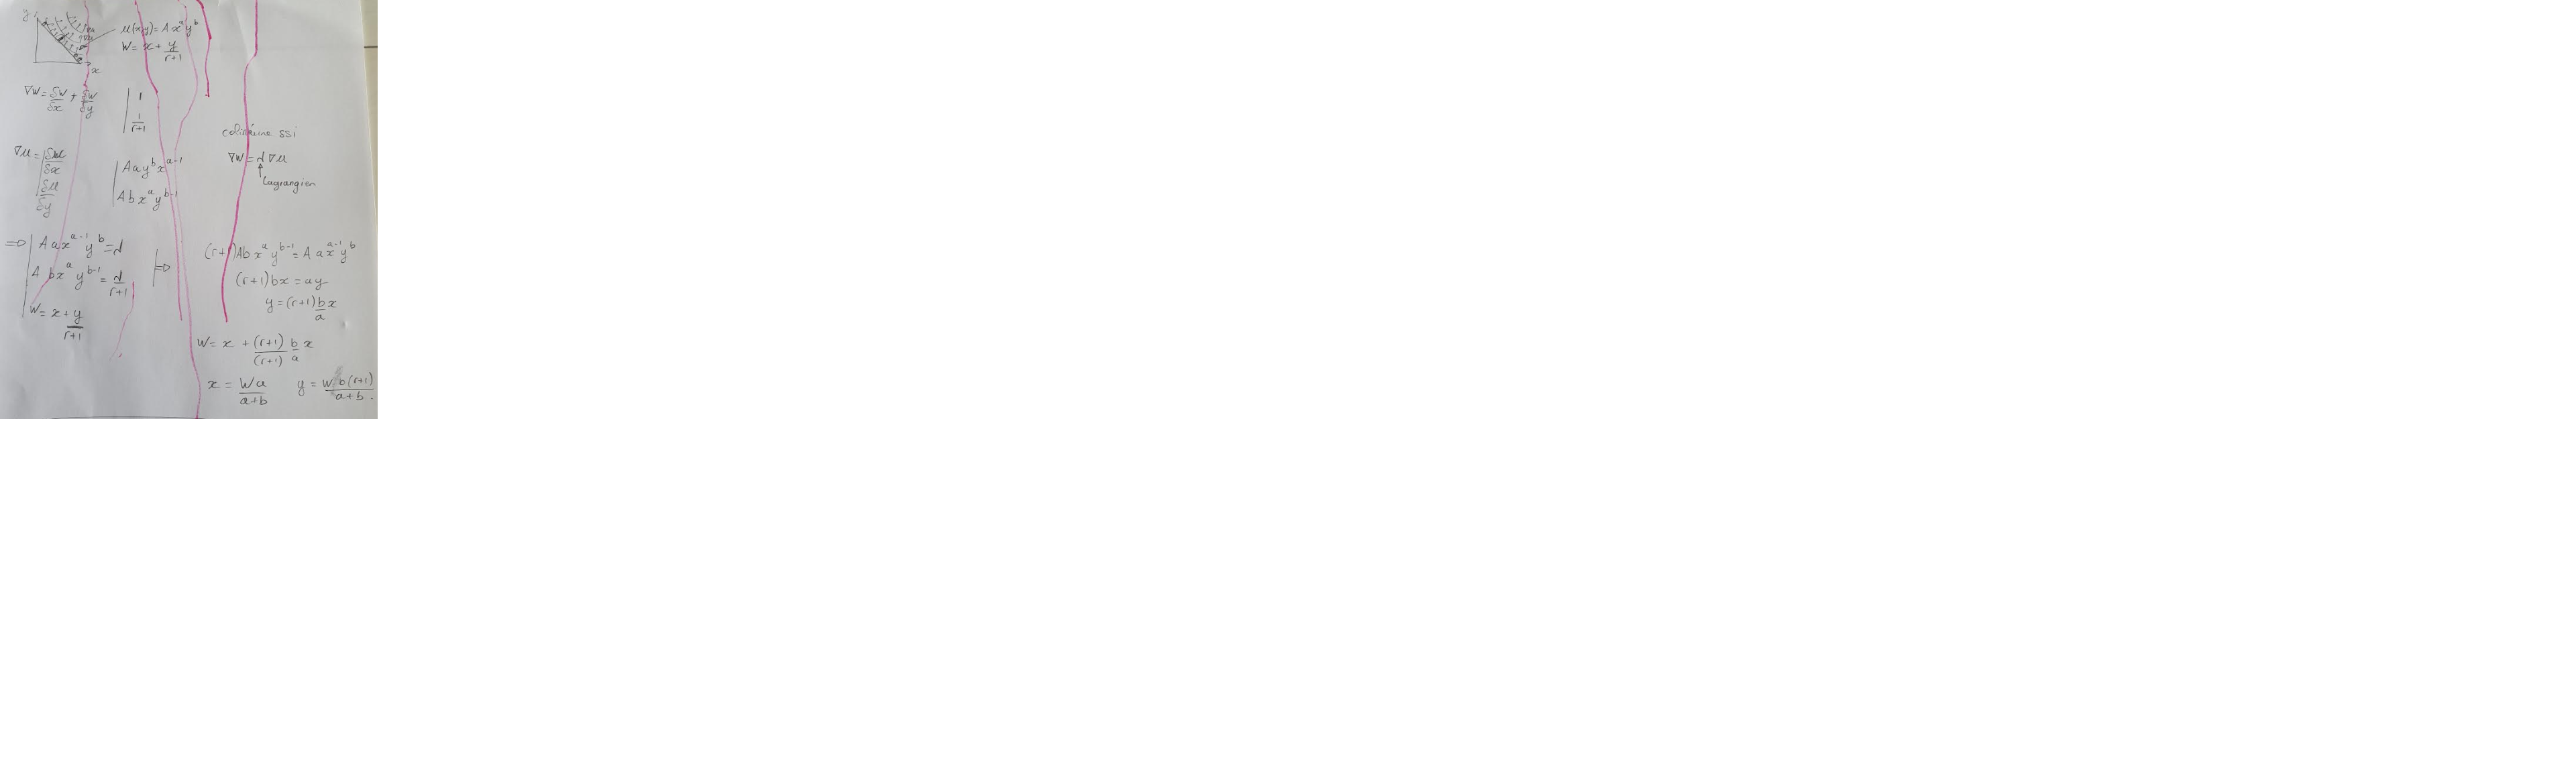

In [18]:
from IPython.display import Image
Image("Lagrange.png")

<IPython.core.display.Javascript object>


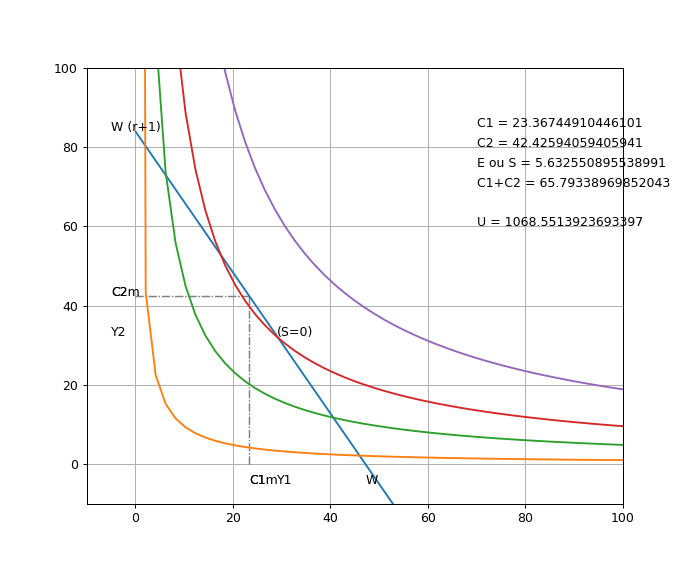

interactive(children=(FloatSlider(value=25.0, description='Y1', step=0.2), FloatSlider(value=25.0, description…

In [22]:
# l'idée ici est de regarder que ce passe t il si on change notre revenu Y1 
# si le taux d'interet effectif r change
# et si possible voir pour un autre individu (avec une courbe d'utilité différente ce que ça donne)

C1 = np.linspace(0.1, 100.0)
fig3 = plt.figure()
ax31 = fig3.add_subplot(1, 1, 1)
ax31.grid()
Y1 = 25 # On a un revenu de 50 
Y2 = 25 # On a un revenu futur de 50 
r = 0.1 # taux d'interet de la conso future 
W = Y1 + Y2 /(1+r) # richesse 
C2 = (1+r)*W - (1+r)*C1 # Conso future que l'on a (actualisation) 

#pour tester 
# U(x,y) = x^dx * y ^dy
# du coup on a 
# y = ( U / (x^dx) )^(1/dy)
def ConsoFutur(Util,c1, dx, dy): # une fonction d'utilité convexe qui ne peut pas se croiser que l'on peut décaler en X et Y
    return np.power(Util * (np.power(c1, -dx)), 1/dy)

def UtilTot(c1 , c2,dx, dy):
    #return np.power(Util /(np.power(c1, dx)), dy)
    return np.power(c1,dx)*np.power(c2,dy)

lineBudget, = ax31.plot(C1, C2, label='Contrainte Budjetaire')

ax31.axis([-10, 100, -10, 100])

lineU1,  = ax31.plot(C1, ConsoFutur(100,C1,1,1) , label='U 1')
lineU5,  = ax31.plot(C1, ConsoFutur(500,C1,1,1) , label='U 5')
lineU10,  = ax31.plot(C1, ConsoFutur(1000,C1,1,1) , label='U 10')
lineUVar,  = ax31.plot(C1, ConsoFutur(2000,C1,1,1) , label='U Var')

# Ok on peut jouer avec les courbes d'utilités
info1 = ax31.text(Y1,-5,"Y1")
info2 = ax31.text(-5,Y2,"Y2")
info3 = ax31.text(Y1 + Y2/(1+r) ,-5,"W")
info4 = ax31.text(-5, (r+1)*Y1 + Y2 ,"W (r+1)")
info5 = ax31.text(Y1, Y2 ,"(S=0)")

# Ensuite on se place dans une situation de je consomme C1 et j'épargne le reste 
# On va faire 2 cas 
# un mec normal qui ne connait pas sa courbe d'utilité
# un gars qui Consomme plus que son revenu ("Débiteur")
# un gars qui Consomme moins que son revenu et donc épargne ("Crediteur")

# un homo-economicus qui maximise son utilité 
# et là du coup ça depend de son utilité ... 
# 1/ il prefere Consommer
# 2/ il prefere Epargner
ConsoNow = 60
ConsoFuturBudget = (1+r)*(W - ConsoNow)

textC1 = ax31.text(ConsoNow,-5,"C1")
textC2 = ax31.text(-5, (1+r)*W - (1+r)*ConsoNow,"C2")
linePointille = [[((ConsoNow),0),(ConsoNow, (1+r)*W - (1+r)*ConsoNow)] , [(0 , (1+r)*W - (1+r)*ConsoNow),( ConsoNow , ((1+r)*W - (1+r)*ConsoNow))]]
lc = mc.LineCollection(linePointille, linewidths=1,linestyle='dashdot',color='grey')
ax31.add_collection(lc) 
textinfoC1 =  ax31.text(70,85,"C1 = "+str(ConsoNow))
textinfoC2 =  ax31.text(70,80,"C2 = "+str(ConsoFuturBudget))
#textinfoU2 =  ax31.text(70,75,"U2 = "+str(ConsoFutur(2000.0,ConsoNow, 1.0, 1.0)))
textCTot = ax31.text(70,70,"C1+C2 = "+str(ConsoNow+(1+r)*(W-ConsoNow)))
textUtilite = ax31.text(70,60,"U = "+str("???"))

Xm = W * 1 *(r+1)/(1+1)
Ym = W * 1 *(r+1)/(1+1)
textXm = ax31.text(Xm,-5,str("C1m"))
textYm = ax31.text(-5,Ym,str("C2m"))

linePointilleMax = [[(Xm,0),(Xm,Ym)] , [(0,Ym),(Xm,Ym)]]
lcm = mc.LineCollection(linePointilleMax, linewidths=1,linestyle='dashdot',color='grey')
ax31.add_collection(lcm) 
textinfoE = ax31.text(70,75,"Epargne = "+str(Y1 - C1))

def update3(Y1 = 25.0, Y2=25 , r = 0.1, Uvar2 = 20.0, Udx = 0.69 ,Udy = 1.21, ConsoNow = 35, HomoEconomicus = False):
    
    
    ax31.collections.clear()
    
    
    W = Y1 + Y2 /(1+r) # richesse 
    C2 = (1+r)*W - (1+r)*C1 # droite de contrainte budget
    lineBudget.set_ydata(C2)
    lineU1.set_ydata(ConsoFutur(100,C1,Udx,Udy))
    lineU5.set_ydata(ConsoFutur(500,C1,Udx,Udy))
    lineU10.set_ydata(ConsoFutur(1000,C1,Udx,Udy))
    lineUVar.set_ydata(ConsoFutur(Uvar2*100,C1,Udx,Udy))
    info1.set_position((Y1,-5))
    info2.set_position((-5,Y2))
    info3.set_position((Y1 + Y2/(1+r),-5))
    info4.set_position((-5, (r+1)*Y1 + Y2 ))
    info5.set_position((Y1, Y2 ))
    
    
     
                    
    if (HomoEconomicus):
        # l'idée ici est d'optimiser l'utilité 
        # la meilleure Utilité possible A
        
        
        Xm = W * Udx /(Udx+Udy)
        Ym = W * Udy *(r+1)/(Udx+Udy)
        
        textXm.set_position((Xm,-5))
        textYm.set_position((-5,Ym))
                            
        textXm.set_text(str("C1m"))
        textYm.set_text(str("C2m"))
        
        linePointilleMax = [[(Xm,0),(Xm,Ym)] , [(0,Ym),(Xm,Ym)]]
        lcm = mc.LineCollection(linePointilleMax, linewidths=1,linestyle='dashdot',color='grey')
        ax31.add_collection(lcm)
        
        ConsoNow = Xm
    else:
        textXm.set_text("")
        textYm.set_text("")
    
    
    textC1.set_position((ConsoNow,-5 ))
    ConsoFuturBudget = (1+r)*(W - ConsoNow)
    textC2.set_position((-5,ConsoFuturBudget))
    textCTot.set_text("C1+C2 = "+str(ConsoNow+ConsoFuturBudget))
    textUtilite.set_text("U = "+str(UtilTot(ConsoNow,ConsoFuturBudget,Udx,Udy)))    
    textinfoC1.set_text("C1 = "+str(ConsoNow))
    textinfoC2.set_text("C2 = "+str(ConsoFuturBudget))
    #textinfoU2.set_text("U2 = "+str(ConsoFutur(Uvar2*100,ConsoNow, Udx, Udy)))
    textinfoE.set_text("E ou S = "+str(Y1 - ConsoNow))
    
    linePointille = [[((ConsoNow),0),(ConsoNow, (1+r)*W - (1+r)*ConsoNow)] , [(0 , (1+r)*W - (1+r)*ConsoNow),( ConsoNow , ((1+r)*W - (1+r)*ConsoNow))]]
    lc = mc.LineCollection(linePointille, linewidths=1,linestyle='dashdot',color='grey')
    ax31.add_collection(lc) 
    
  
#Y1=widgets.FloatSlider(min=0, max=100.0, step=0.2, value=25.0)    
#Y2=widgets.FloatSlider(min=0, max=100.0, step=0.2, value=25.0)
#r=widgets.FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.1)
#Uvar=widgets.FloatSlider(min=1.0, max=20.0, step= 0.1, value=10.0)
#Udx=widgets.FloatSlider(min=0, max=3, step=0.01, value=1)
#Udy=widgets.FloatSlider(min=0, max=3, step=0.01, value=1)
#ConsoNow=widgets.FloatSlider(min=0, max=100.0, step=1, value=60)
#ui = widgets.HBox([widgets.VBox([Y1, Y2, ConsoNow]),widgets.VBox([r, Uvar, Udx,Udy])])
#out = widgets.interactive_output(update3, {'Y1': Y1, 'Y2': Y2, 'r': r ,'Uvar': Uvar, 'Udx': Udx, 'Udy': Udy,'ConsoNow': ConsoNow})
#display(ui)

interact(update3,
         Y1=widgets.FloatSlider(min=0, max=100.0, step=0.2, value=25.0),
         Y2=widgets.FloatSlider(min=0, max=100.0, step=0.2, value=25.0),
         r=widgets.FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.1),
         Uvar2=widgets.FloatSlider(min=1.0, max=20.0, step= 0.1, value=20.0),
         Udx=widgets.FloatSlider(min=0, max=3, step=0.01, value=0.69),
         Udy=widgets.FloatSlider(min=0, max=3, step=0.01, value=1.21),
         ConsoNow=widgets.FloatSlider(min=0, max=100.0, step=1, value=35),
         );

SECTION III – L’HYPOTHESE DU CYCLE DE VIE DE MODIGLIANI
Dans les années 1950, Franco Modigliani va se référer aux conclusions du modèle de Fisher
de la consommation pour tenter de résoudre l’énigme de la consommation et expliquer la
contradiction entre la théorie keynésienne et les faits observés.
Comme nous l’avons vu, le modèle de Fisher suppose que la consommation d’une période
dépend des revenus de toutes les périodes. L’hypothèse que va poser Modigliani est que le
revenu est cyclique, qu’il est variable le long de la vie et que les ménages vont transférer une
partie de leurs revenus des années « grasses » vers la consommation des années « maigres ».
L’objectif de ces transferts de revenus est d’avoir une structure de consommation relativement
stable durant toute la vie. 

Pour illustrer la contribution de Modigliani, nous supposons un ménage qui dispose d’une
richesse initiale égale à Wo. Ce ménage s’attend à vivre encore n années dont e années
d’activité et (n - e) années de retraite. Il perçoit, durant la période d’activité, un revenu annuel
constant égal à Y. Il ne lègue rien à ses héritiers. 

Les ressources de ce ménages s’élèvent à : Wo + e Y
Sa consommation annuelle sera donc : (Wo + e Y)/n

C = Wo/n +e/n*Y : donc une droite pour n année de travail et e année de retraite

Cette dernière relation indique que la consommation dépend de la richesse et du revenu. 
Si tous les ménages adoptent un comportement similaire, la fonction de consommation
agrégée sera : C = α W + β Y

Où : α = propension marginale à consommer une partie de la richesse
     β = propension marginale à consommer une partie du revenu
     
Ainsi, la contribution de Modigliani a établi que la consommation des ménages dépend en
partie du revenu courant, mais elle dépend aussi de la richesse. Cette contribution a permis de
résoudre la contradiction entre la théorie de la consommation et l’histoire concrète. 

SECTION IV – L’HYPOTHESE DU REVENU PERMANENT DE M. FRIEDMAN
Comme Modigliani et d’autres auteurs, Friedman va fonder son hypothèse sur celle de Fisher
et va élaborer un plan de consommation qui dépasse de loin la période courante. Il va avancer
les notions de revenu permanent et de consommation permanente. 

La théorie du choix inter temporel montre que la richesse et le taux d’intérêt sont des
variables explicatives de la consommation. Et comme les revenus futurs ne sont pas
observables directement mais anticipés, la richesse elle-même est une notion qui sera, selon
l’approche du revenu permanent, anticipée.

bla bla bla suite géo ... 
au final 
Yp revenu permanent 
Yp = W (r/(1+r))

Mais cette définition théorique du revenu permanent ne permet pas de l’évaluer d’une manière
empirique étant donné l’indétermination des revenus futurs et du taux d’intérêt futur. C’est
pourquoi Friedman a proposé, pour surmonter cette difficulté, une définition empirique qui se
base sur les revenus observés au présent et durant les périodes passées.
L’hypothèse de base est que les revenus courants subissent, d’année en année, des chocs
temporaires aléatoires. Le revenu courant est donc formé par deux composantes : une
composante permanente et une composante transitoire 

Y(t) = Yp(t) + Yt(t)

si on éstime Yp ... avec les data du passé et qu'on s'adapte en évalué la diff .. 
l : taux d'adaptation 

Yp(t) = l * somme (1 -l)Yt(i)

Le revenu permanent est donc la moyenne pondérée des revenus courants des périodes
précédentes. Les coefficients de pondération sont de plus en plus faibles au fur et à mesure
que l’on remonte dans le passé. 




